In [8]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l3 = nn.Linear(2, 3)

In [3]:
torch.manual_seed(123)

l1 = nn.Linear(1, 1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [6]:
for param in l1.named_parameters():
    print('name :', param[0])
    print('tensor :', param[1])
    print('shape :', param[1].shape)
    print('')

name : weight
tensor : Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape : torch.Size([1, 1])

name : bias
tensor : Parameter containing:
tensor([0.0331], requires_grad=True)
shape : torch.Size([1])



In [7]:
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [11]:
x_np = np.arange(-2, 2.1, 1)

x = torch.tensor(x_np).float()
x = x.view(-1, 1)

print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [12]:
y = l1(x)

print(y.shape)
print(y)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]], grad_fn=<AddmmBackward0>)


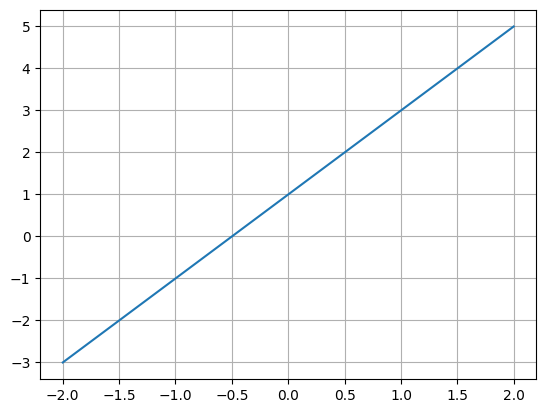

In [15]:
plt.plot(x.data, y.data)
plt.grid()
plt.show()

In [16]:
l2 = nn.Linear(2, 1)

nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [17]:
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [18]:
y2 = l2(x2)

print(y2.shape)
print(y2)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]], grad_fn=<AddmmBackward0>)


In [19]:
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [20]:
y3 = l3(x2)

print(y3.shape)
print(y3)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]], grad_fn=<AddmmBackward0>)


In [21]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [22]:
inputs = torch.ones(100, 1)

n_input = 1
n_output = 1
net = Net(n_input, n_output)
outputs = net(inputs)

In [23]:
criterion = nn.MSELoss()

In [24]:
import pandas as pd

In [25]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('원본 데이터', x_org.shape, yt.shape)
print('항목명 :', feature_names)

원본 데이터 (506, 13) (506,)
항목명 : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
x = x_org[:, feature_names == 'RM']
print('추출 후', x.shape)
print(x[:5, :])

print('정답 데이터')
print(yt[:5])

추출 후 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


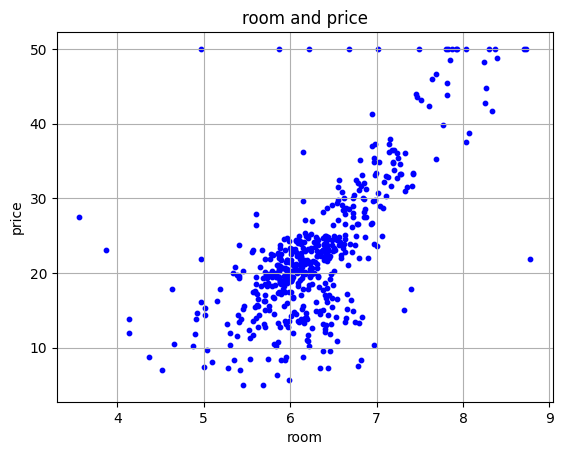

In [29]:
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('room')
plt.ylabel('price')
plt.title('room and price')
plt.grid()
plt.show()

In [30]:
n_input = x.shape[1]
n_output = 1

print(f'입력 차원수: {n_input} 출력 차원수: {n_output}')

입력 차원수: 1 출력 차원수: 1


In [36]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [37]:
net = Net(n_input, n_output)
outputs = net(inputs)

In [38]:
for parameter in net.named_parameters():
    print(f'변수명 : {parameter[0]}')
    print(f'변숫값 : {parameter[1].data}')

변수명 : l1.weight
변숫값 : tensor([[1.]])
변수명 : l1.bias
변숫값 : tensor([1.])


In [39]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [40]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [44]:
from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [48]:
from torch import optim

criterion = nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)